In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
from datetime import datetime
import math
import math
from re import I
import numpy as np
from typing import List, Union, Tuple

In [15]:
#* Get data from Stooq
df = pd.read_csv("https://stooq.com/q/d/l/?s=btc.v&i=m")

In [16]:
#* Simplifed from common
def mean(arr: List[Union[int, float]]) -> Union[int, float]:
  return sum(arr)/len(arr)

def least_squares(X: List[Union[int,float]], Y: List[Union[int, float]]) -> Tuple[list, float, float]:
  assert len(X) == len(Y)
  XY_sigma = 0
  X_squared_sigma = 0
  for x,y in zip(X,Y):
    XY_sigma += x*y
    X_squared_sigma += x**2
  slope = ((len(X) * XY_sigma) - (sum(X) * sum(Y))) / ((len(X) * X_squared_sigma) - (sum(X))**2)
  y_intercept = (sum(Y) - slope * sum(X)) / len(X)
  slope_intercept = lambda x: (slope * x) + y_intercept
  estimates = []
  for x,y in zip(X,Y):
    estimation_y = slope_intercept(x)
    estimates.append(estimation_y)
  return estimates, slope, y_intercept

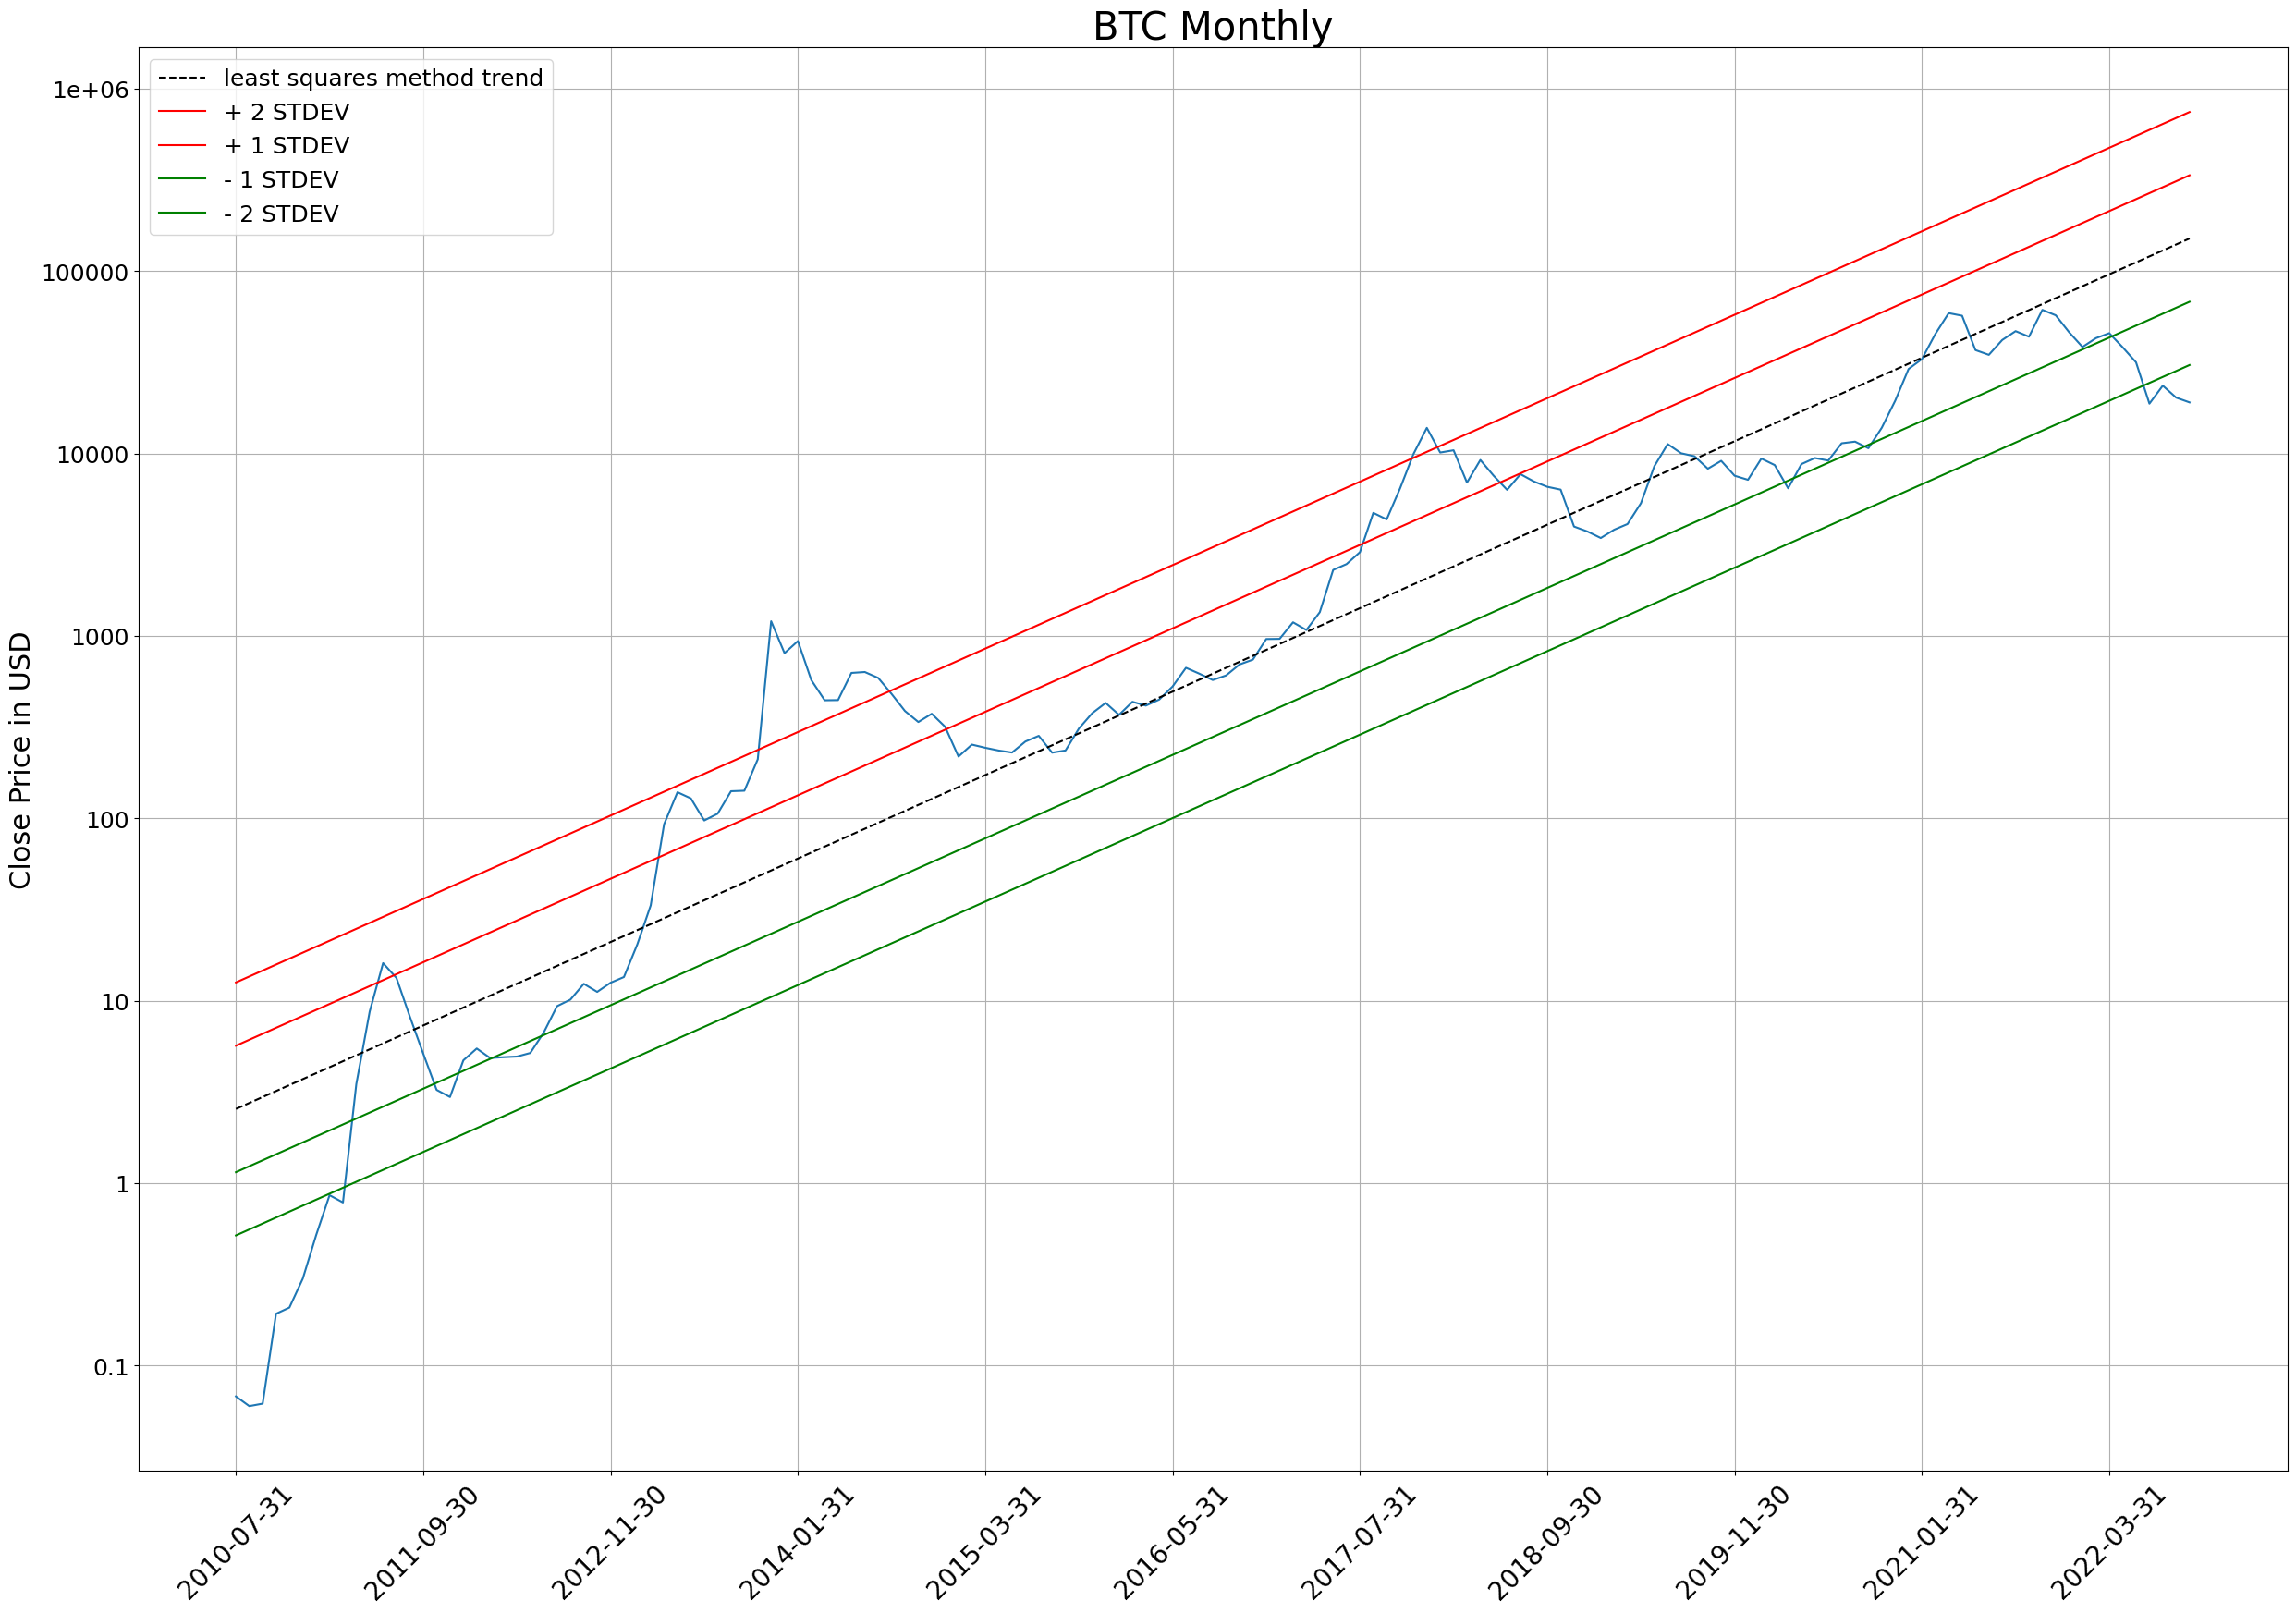

In [17]:
Y = np.log10(df['Close'])
X = range(df.shape[0])
est, slope, y_intercept = least_squares(X, Y)

low = min(df['Close'])
high = max(df['Close'])

DATES_INTERVAL = df.shape[0]//10

fig, ax = plt.subplots(figsize=(30,20))


len_range = range(df.shape[0])
plt.plot(len_range, Y)
plt.plot(len_range, est, "--k", label="least squares method trend")
plt.plot(len_range, est + np.std(est)/2, "r", label="+ 2 STDEV")
plt.plot(len_range, est + np.std(est)/4, "r", label="+ 1 STDEV")
plt.plot(len_range, est - np.std(est)/4, "g", label="- 1 STDEV")
plt.plot(len_range, est - np.std(est)/2, "g", label="- 2 STDEV")


plt.yscale('linear')
legend = plt.legend(loc='upper left', fontsize=18)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(10**y)))


plt.xticks(range(0, df.shape[0], DATES_INTERVAL), df['Date'].loc[::DATES_INTERVAL], rotation=45, fontsize=20)
plt.yticks(fontsize=18)
plt.grid(True)
plt.title('BTC Monthly', fontsize=30)
plt.ylabel('Close Price in USD', fontsize=22)
plt.show()